In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [6]:
df = pd.read_csv('train.csv')

In [7]:
df.head(3)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [9]:
df.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [11]:
# fillna값 채우기
df['Age'].fillna(df['Age'].mean(), inplace=True)
df['Cabin'].fillna('N', inplace=True)
df['Embarked'].fillna('N', inplace=True)

In [12]:
df.isna().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
dtype: int64

In [33]:
df['Sex'].value_counts()

male      577
female    314
Name: Sex, dtype: int64

In [34]:
df['Cabin'].value_counts()

N              687
C23 C25 C27      4
G6               4
B96 B98          4
C22 C26          3
              ... 
E34              1
C7               1
C54              1
E36              1
C148             1
Name: Cabin, Length: 148, dtype: int64

In [35]:
df['Embarked'].value_counts()

S    644
C    168
Q     77
N      2
Name: Embarked, dtype: int64

In [36]:
df['Cabin'] = df['Cabin'].str[:1]

In [39]:
df['Cabin'].value_counts()

N    687
C     59
B     47
D     33
E     32
A     15
F     13
G      4
T      1
Name: Cabin, dtype: int64

In [41]:
df.groupby(['Sex','Survived'])['Survived'].count()

Sex     Survived
female  0            81
        1           233
male    0           468
        1           109
Name: Survived, dtype: int64

<Axes: xlabel='Sex', ylabel='Survived'>

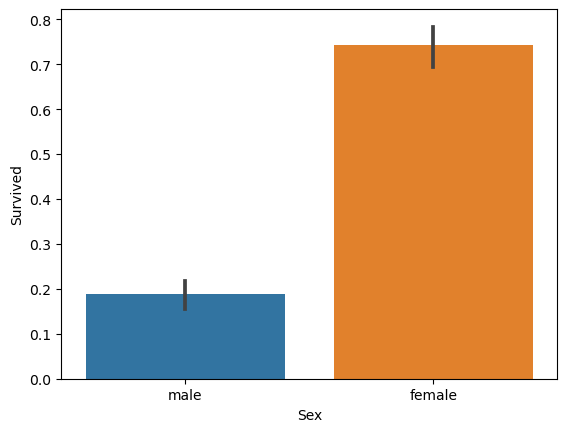

In [42]:
sns.barplot(x='Sex', y='Survived', data=df)

<Axes: xlabel='Pclass', ylabel='Survived'>

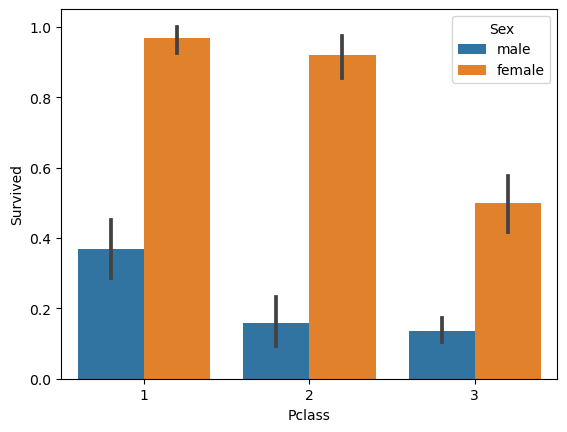

In [44]:
sns.barplot(x='Pclass', y='Survived', hue='Sex', data=df)

In [45]:
def get_category(age):
    cat = ''
    if age <= -1 :cat = 'Unknown'
    elif age <= 5 :cat = 'Baby'
    elif age <= 12 :cat = 'Child'
    elif age <= 18 :cat = 'Teenager'
    elif age <= 25 :cat = 'Student'
    elif age <= 35 :cat = 'Young Adult'
    elif age <= 60 :cat = 'Adult'
    else: cat = 'Elderly'
    return cat

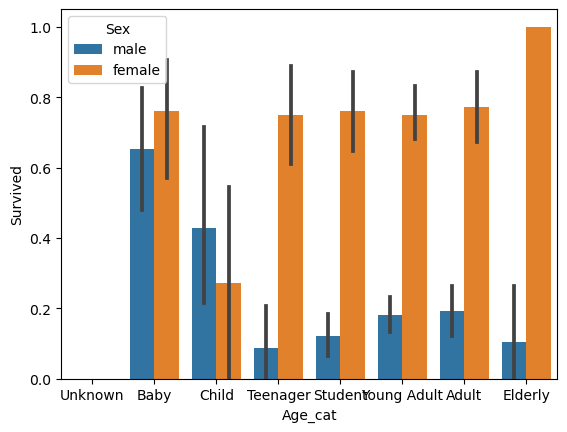

In [52]:
df['Age_cat'] = df['Age'].apply(get_category)

order_list = ['Unknown','Baby','Child','Teenager','Student','Young Adult','Adult','Elderly']
sns.barplot(x='Age_cat',
            y='Survived',
            data=df,
            hue='Sex',order=order_list)
df.drop(columns='Age_cat', inplace=True)

In [51]:
from sklearn.preprocessing import LabelEncoder

In [55]:
def encode_features(df):
    features = ['Cabin','Sex','Embarked']
    for feature in features:
        le = LabelEncoder()
        df[feature] = le.fit_transform(df[feature])
    return df

In [57]:
df = encode_features(df)
df.head(2)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,7,3
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,71.2833,2,0


In [58]:
def fillna(df):
    df['Age'].fillna(df['Age'].mean(), inplace=True)
    df['Cabin'].fillna('N', inplace=True)
    df['Embarked'].fillna('N', inplace=True)
    df['Fare'].fillna(0, inplace=True)
    return df

def drop_features(df):
    df.drop(columns=['PassengerId','Name','Ticket'],
            inplace=True)
    return df

def format_features(df):
    from sklearn.preprocessing import LabelEncoder
    df['Cabin'] = df['Cabin'].str[:1]
    features = ['Cabin','Sex','Embarked']
    for feature in features:
        le = LabelEncoder()
        df[feature] = le.fit_transform(df[feature])
    return df

def transform_features(df):
    df = fillna(df)
    df = drop_features(df)
    df = format_features(df)
    return df

In [59]:
df = pd.read_csv('train.csv')
y = df['Survived']
x = df.drop(columns='Survived')
x = transform_features(x)

In [60]:
from sklearn.model_selection import train_test_split

In [61]:
x_train, x_test, y_train, y_test = train_test_split(x,
                                                    y,
                                                    test_size=0.2,
                                                    random_state=11)

In [83]:
y_train.value_counts()

0    431
1    281
Name: Survived, dtype: int64

In [63]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [75]:
import warnings
warnings.filterwarnings('ignore')

In [76]:
dt_clf = DecisionTreeClassifier(random_state=11)
rf_clf = RandomForestClassifier(random_state=11)
lr_clf = LogisticRegression()

dt_clf.fit(x_train,y_train)
rf_clf.fit(x_train,y_train)
lr_clf.fit(x_train,y_train)

dt_pred = dt_clf.predict(x_test)
rf_pred = rf_clf.predict(x_test)
lr_pred = lr_clf.predict(x_test)

print(f'{dt_clf.__class__.__name__} 정확도 : {accuracy_score(y_test,dt_pred)}')
print(f'{rf_clf.__class__.__name__} 정확도 : {accuracy_score(y_test,rf_pred)}')
print(f'{lr_clf.__class__.__name__} 정확도 : {accuracy_score(y_test,lr_pred)}')

DecisionTreeClassifier 정확도 : 0.7877094972067039
RandomForestClassifier 정확도 : 0.8547486033519553
LogisticRegression 정확도 : 0.8491620111731844


In [77]:
from sklearn.model_selection import KFold

In [82]:
def exec_kfold(x,clf,folds=5):
    kfold = KFold(n_splits=folds)
    scores = []
    for iter_count,(train_index,test_index) in enumerate(kfold.split(x)):
        x_train, x_test = x.values[train_index], x.values[test_index]
        y_train, y_test = y.values[train_index], y.values[test_index]
        pred = clf.predict(x_test)
        accuracy = accuracy_score(y_test,pred)
        scores.append(accuracy)
        print(f'교차검증 {iter_count} 정확도: {accuracy}')
    print(f'평균 정확도: {np.mean(scores):.4f}')

# DecisionTreeClassifier 정확도 : 0.7877094972067039
exec_kfold(x,dt_clf)

교차검증 0 정확도: 0.9385474860335196
교차검증 1 정확도: 0.9325842696629213
교차검증 2 정확도: 0.9382022471910112
교차검증 3 정확도: 0.9550561797752809
교차검증 4 정확도: 0.9662921348314607
평균 정확도: 0.9461


In [79]:
exec_kfold(x,rf_clf)
# RandomForestClassifier 정확도 : 0.8547486033519553

교차검증 0 정확도: 0.9608938547486033
교차검증 1 정확도: 0.949438202247191
교차검증 2 정확도: 0.9550561797752809
교차검증 3 정확도: 0.9662921348314607
교차검증 4 정확도: 0.9662921348314607
평균 정확도: 0.9596


In [81]:
exec_kfold(x,lr_clf)
# LogisticRegression 정확도 : 0.8491620111731844

교차검증 0 정확도: 0.8156424581005587
교차검증 1 정확도: 0.797752808988764
교차검증 2 정확도: 0.7752808988764045
교차검증 3 정확도: 0.7640449438202247
교차검증 4 정확도: 0.8089887640449438
평균 정확도: 0.7923


In [84]:
from sklearn.model_selection import cross_val_score

In [90]:
%%time
dt_s = cross_val_score(dt_clf,x,y,cv=5)
dt_s,np.mean(dt_s)
# DecisionTreeClassifier 정확도 : 0.7877094972067039
# 평균 정확도: 0.9461

CPU times: total: 15.6 ms
Wall time: 27.4 ms


(array([0.74301676, 0.7752809 , 0.79213483, 0.78651685, 0.84269663]),
 0.7879291946519366)

In [92]:
%%time
rf_s = cross_val_score(rf_clf,x,y,cv=5)
rf_s,np.mean(rf_s)
# RandomForestClassifier 정확도 : 0.8547486033519553
# 평균 정확도: 0.9596

CPU times: total: 688 ms
Wall time: 727 ms


(array([0.79329609, 0.79775281, 0.84831461, 0.76404494, 0.86516854]),
 0.8137153976523758)

In [93]:
%%time
lr_s = cross_val_score(lr_clf,x,y,cv=5)
lr_s,np.mean(lr_s)
# LogisticRegression 정확도 : 0.8491620111731844
# 평균 정확도: 0.7923

CPU times: total: 62.5 ms
Wall time: 79.3 ms


(array([0.79888268, 0.76966292, 0.78089888, 0.7752809 , 0.81460674]),
 0.7878664239532985)

In [94]:
from sklearn.model_selection import GridSearchCV

In [97]:
%%time
param = {
    'max_depth':[2,3,5,10],
    'min_samples_split':[2,3,5],
    'min_samples_leaf':[1,5,8],
}
grid_dtclf = GridSearchCV(dt_clf,
                         param_grid=param,
                         scoring='accuracy',
                         cv=5)
grid_dtclf.fit(x_train,y_train)
print(f'최적 하이퍼 파라미터:',grid_dtclf.best_params_)
print(f'최고 정확도',grid_dtclf.best_score_)

최적 하이퍼 파라미터: {'max_depth': 3, 'min_samples_leaf': 5, 'min_samples_split': 2}
최고 정확도 0.7991825076332119
CPU times: total: 594 ms
Wall time: 634 ms


In [98]:
best_dtclf = grid_dtclf.best_estimator_
pred = best_dtclf.predict(x_test)
accuracy_score(y_test,pred)

0.8715083798882681

In [99]:
%%time
param = {
    'max_depth':[2,3,5,10],
    'min_samples_split':[2,3,5],
    'min_samples_leaf':[1,5,8],
    'n_estimators':[100,200]
}
grid_rfclf = GridSearchCV(rf_clf,
                         param_grid=param,
                         scoring='accuracy',
                         cv=5)
grid_rfclf.fit(x_train,y_train)
print(f'최적 하이퍼 파라미터:',grid_rfclf.best_params_)
print(f'최고 정확도',grid_rfclf.best_score_)

best_rfclf = grid_rfclf.best_estimator_
pred = best_rfclf.predict(x_test)
accuracy_score(y_test,pred)

최적 하이퍼 파라미터: {'max_depth': 5, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}
최고 정확도 0.8145966709346991
CPU times: total: 1min 4s
Wall time: 1min 5s


0.88268156424581

In [28]:
# 성별에 따른 생존률
df.groupby(['Sex',])['Survived'].mean()*100

Sex
female    74.203822
male      18.890815
Name: Survived, dtype: float64

<Axes: xlabel='Sex'>

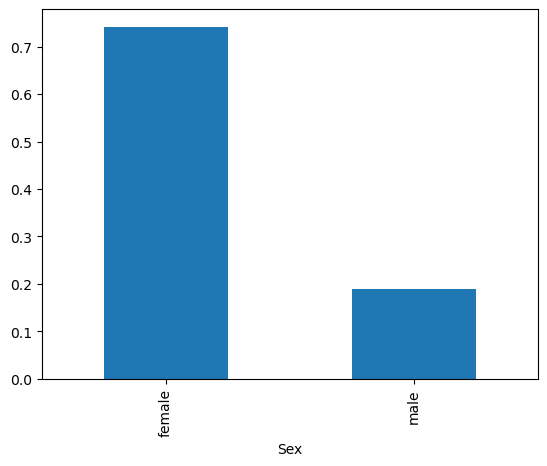

In [20]:
df.groupby(['Sex',])['Survived'].mean().plot(kind='bar')

In [27]:
# 중간 정착 항구
df.groupby(['Embarked',])['Survived'].mean()*100

Embarked
C     55.357143
N    100.000000
Q     38.961039
S     33.695652
Name: Survived, dtype: float64

<Axes: xlabel='Embarked'>

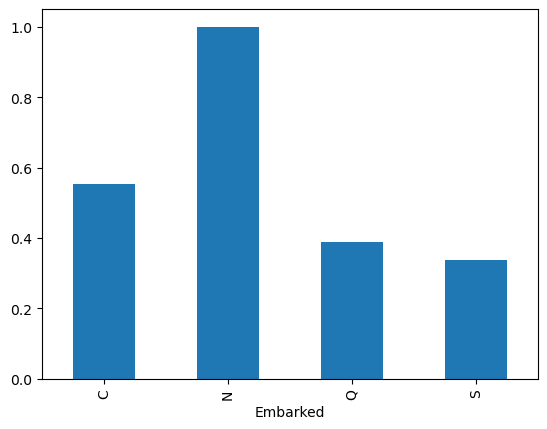

In [16]:
df.groupby(['Embarked',])['Survived'].mean().plot(kind='bar')

In [17]:
# 선실등급
df.groupby(['Pclass',])['Survived'].mean()*100

Pclass
1    62.962963
2    47.282609
3    24.236253
Name: Survived, dtype: float64

<Axes: xlabel='Pclass'>

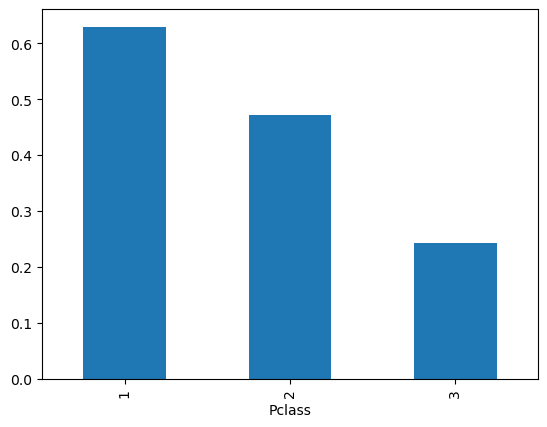

In [18]:
df.groupby(['Pclass',])['Survived'].mean().plot(kind='bar')

In [31]:
df.groupby(['SibSp',])['Survived'].mean()*100

SibSp
0    34.539474
1    53.588517
2    46.428571
3    25.000000
4    16.666667
5     0.000000
8     0.000000
Name: Survived, dtype: float64

<Axes: xlabel='SibSp'>

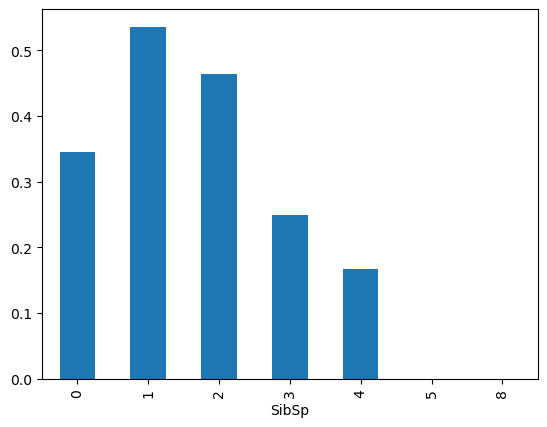

In [32]:
df.groupby(['SibSp',])['Survived'].mean().plot(kind='bar')